In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
datagen = ImageDataGenerator()

In [3]:
class_names = ['glioma', 'meningioma','notumor','pituitary']

In [4]:
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Tumor/dataset", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=16, 
    class_mode="categorical", 
)

Found 4272 images belonging to 4 classes.


In [5]:
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Tumor/dataset", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=16, 
    class_mode="categorical", 
)

Found 4272 images belonging to 4 classes.


In [6]:
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/dsrag/OneDrive/Documents/Project/Project_Tumor/dataset", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=16, 
    class_mode="categorical", 
)

Found 4272 images belonging to 4 classes.


In [13]:
efficient_net = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in efficient_net.layers:
    layer.trainable = False

In [15]:
x = efficient_net.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(4, activation='softmax')(x)
model = Model(inputs=efficient_net.input, outputs=predictions)

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

def trainModel(model, epochs, optimizer):
    batch_size = 16
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(
        "model_weights.keras",
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True,
        mode='max'
    )
    callbacks_list = [checkpoint]
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

In [19]:
model_history = trainModel(model=model, epochs=120, optimizer="Adam")

Epoch 1/120


C:\Users\dsrag\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.4780 - loss: 1.1919
Epoch 1: val_accuracy improved from -inf to 0.82865, saving model to model_weights.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 106s 361ms/step - accuracy: 0.4785 - loss: 1.1909 - val_accuracy: 0.8287 - val_loss: 0.4483
Epoch 2/120
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7552 - loss: 0.6103
Epoch 2: val_accuracy improved from 0.82865 to 0.86868, saving model to model_weights.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 92s 343ms/step - accuracy: 0.7552 - loss: 0.6102 - val_accuracy: 0.8687 - val_loss: 0.3571
Epoch 3/120
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8090 - loss: 0.4950
Epoch 3: val_accuracy improved from 0.86868 to 0.88085, saving model to model_weights.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 90s 337ms/step - accuracy: 0.8090 - loss: 0.4950 - val_accuracy: 0.8809 - val_loss: 0.3126
Epoch 4/120
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8282 - loss: 0.4552
Epoch 4: val_accuracy 

In [21]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("modeleffinetFINAL.h5")

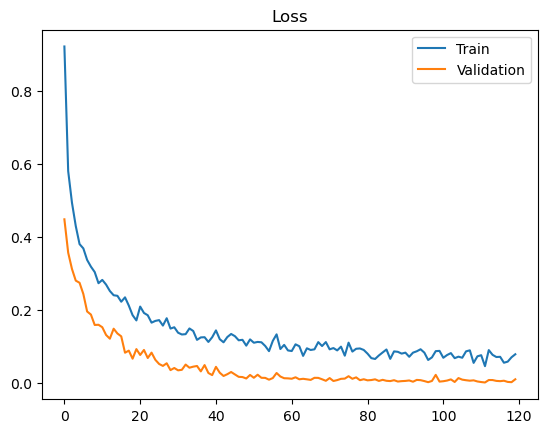

In [23]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

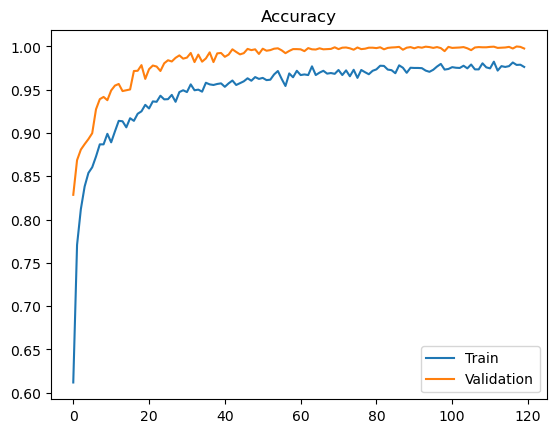

In [25]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

267/267 ━━━━━━━━━━━━━━━━━━━━ 49s 183ms/step - accuracy: 0.9969 - loss: 0.0131
The test loss is:  0.011063259094953537
The best accuracy is:  99.76591467857361


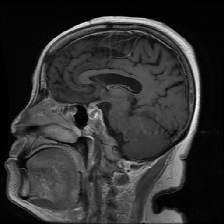

In [37]:
img = tf.keras.preprocessing.image.load_img('pitu.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img


In [39]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[1.2984087e-03 3.9108962e-02 2.7202839e-06 9.5958996e-01]]


In [41]:
import numpy as np

class_names = ['glioma', 'meningioma','notumor','pituitary']

predicted_index = np.argmax(predictions)

predicted_class = class_names[predicted_index]

print(f"Predicted class: {predicted_class}")

Predicted class: pituitary
